<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/8_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 패션 MNIST 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

# (48000, 28, 28) -> (48000, 28, 28, 1) 크기로 변환하고 255로 나눈 표준화 전처리.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, random_state=42, test_size=0.2)

In [4]:
# 합성곱 신경망 만들기
# keras.Sequential() 로 입력층 이후의 각 레이어를 순차적으로 정의해보자.

#1. 합성곱 층 (1)
# 필터 개수: 32개
# 커널 크기: (3, 3)
# 스트라이드: 1 (=default)
# 패딩: 세임 패딩 (!=default)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1), strides=1))

In [5]:
#2. 풀링 층 (1)
# 전형적인 풀링 크기인 (2, 2)로 맥스풀링 층 추가.
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 합성곱 층에서 세임패딩을 거쳤기 때문에, (28, 28, 32) 가 될 것이고, 
# 풀링 층에서 (2, 2) 크기의 풀링을 거쳤기 때문에, 최종 피쳐맵의 shape은 (14, 14, 32)가 된다.

# 합성곱 층 (2)
# 필터 개수: 64개
# 커널 크기: (3, 3)
# 스트라이드: 1 (=Default)
# 패딩: 세임 패딩 (!=default)
model.add(keras.layers.Conv2D(64, padding='same', strides=1, kernel_size=(3,3), activation='relu'))

# 풀링 층 (2)
# 풀링 크기: (2, 2)
model.add(keras.layers.MaxPooling2D(2))

In [7]:
# 두 번째 합성곱 층을 거치면서 (14, 14, 64)의 피쳐맵이 생성되며, 두 번째 풀링 층을 거치면서 (7, 7, 64) 피쳐맵이 만들어진다.

# 이제 최종적으로 이 3차원 피쳐맵을 일렬로 펼쳐서 밀집층을 통과하게 해보자.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))

# 출력층과 밀집층 사이에 드롭아웃층을 넣어서 모델이 과대적합 되는 것을 방지해주자.
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
# 이제, 만들어진 모델의 개요를 확인해보자.
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

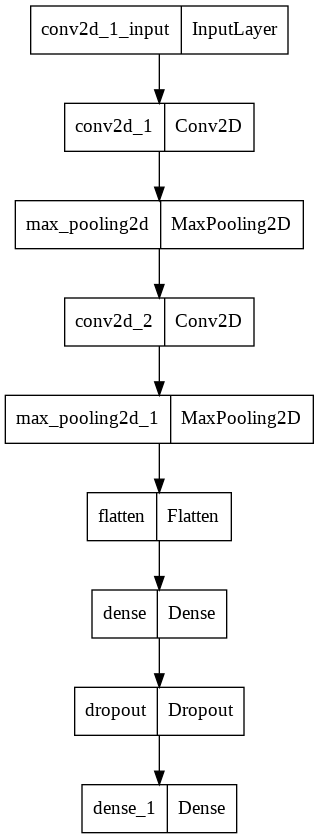

In [10]:
# 이렇게 model.summary() 로도 만든 모델의 전체적인 정보를 알 수 있지만, 도식화 해주는 방법도 있다.
# keras.utils 에 있는 plot_model() 함수를 사용해보자

keras.utils.plot_model(model)

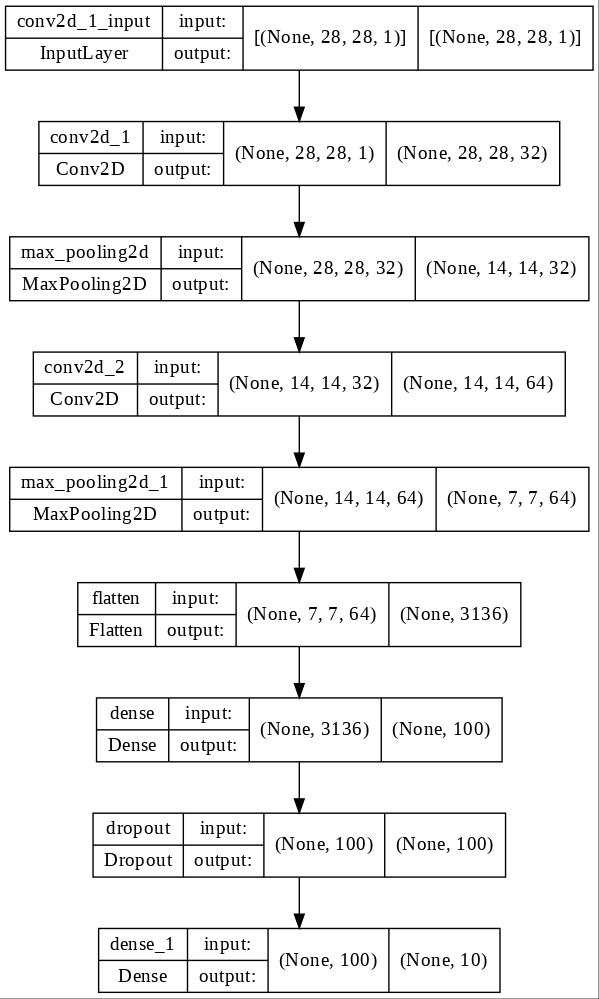

In [12]:
# 세부적으로 아래 매개변수를 주어 더 자세한 도식을 확인할 수 있다.
# show_shapes (True/False) : 입력과 출력의 크기를 표현
# dpi: 해상도
# to_file: 출력한 이미지를 파일로 저장.
keras.utils.plot_model(model, dpi=100, to_file='cnn-architecture.jpg', show_shapes=True)

In [13]:
# 모델 컴파일과 훈련
# 먼저 만든 모델을 loss, optimizer, metrics를 지정하자
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.5453 - accuracy: 0.8033 - val_loss: 0.3574 - val_accuracy: 0.8636
Epoch 2/20
1500/1500 [==============================] - 61s 41ms/step - loss: 0.3615 - accuracy: 0.8711 - val_loss: 0.2889 - val_accuracy: 0.8930
Epoch 3/20
1500/1500 [==============================] - 89s 60ms/step - loss: 0.3067 - accuracy: 0.8881 - val_loss: 0.2583 - val_accuracy: 0.9032
Epoch 4/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2737 - accuracy: 0.9008 - val_loss: 0.2374 - val_accuracy: 0.9103
Epoch 5/20
1500/1500 [==============================] - 66s 44ms/step - loss: 0.2497 - accuracy: 0.9080 - val_loss: 0.2412 - val_accuracy: 0.9109
Epoch 6/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2298 - accuracy: 0.9150 - val_loss: 0.2297 - val_accuracy: 0.9147
Epoch 7/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2089 - accuracy: 0.9217 - val_loss: 0.2274 -

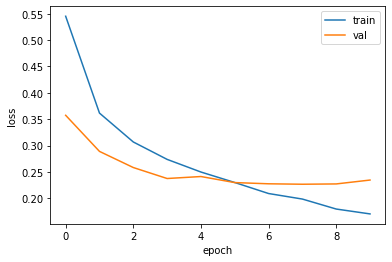

In [14]:
# 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 확인해보자
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# [7] 에포크가 가장 최적으로 생각할 수 있다.

In [15]:
# EarlyStopping 클래스에서 restore_best_weights=True 로 설정했으므로, 현재 model 객체가 최적의 모델 파라미터로 복원되어 있다.
# ModelCheckpoint 콜백이 저장한 best-cnn-model.h5 파일을 다시 읽을 필요가 없다.

# 검증 세트에 대한 성능을 평가해보자.
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2266 - accuracy: 0.9189


[0.22656574845314026, 0.918916642665863]

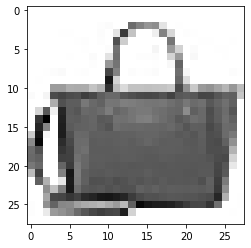

In [16]:
# 예상했던대로 8/20 epoch 의 검증 점수를 최적이라고 판단했다.
# predict() 메서드를 활용해서 새로운 데이터에 대해 예측을 만들어보자.

# 검증세트의 첫 번째 샘플을 처음 본 이미지라고 가정하고, 확인해보자.
# 검증세트[1]의 shape이 (28, 28, 1) 이나, matplotlib 은 2D 만 처리가능하므로 reshape 해주자.

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [18]:
# 이 샘플에 대한 예측 결과를 확인해보자.
preds = model.predict(val_scaled[0:1])
print(preds)

# 0:1 로 한 이유는?
# fit(), predict(), evaluate() 메서드들은 모두 입력의 첫 번째 차원이 배치 차원이라고 가정한다.
# 따라서 샘플 하나를 전달할 때, (28, 28, 1)이 아니라, (1, 28, 28, 1) 크기를 전달해야 한다.
# 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나더라도, 전체 차원이 유지되어 (1, 28, 28, 1) 크기를 만든다.

[[1.0886330e-15 3.2480780e-28 2.3051865e-18 4.8970797e-21 5.7524238e-17
  3.6822891e-13 5.5923749e-17 1.1985664e-14 1.0000000e+00 6.6275444e-17]]


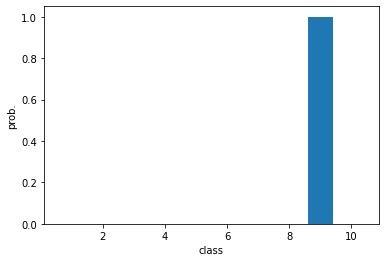

In [20]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [21]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
# preds 로 예측한 확률대로 [8]의 확률이 가장 높다고 판단하였고, 그것은 가방이었다.
# 합성곱 신경망으로 예측결과가 실제 타켓클래스와 동일했다.

# 마지막으로 맨 처음에 떼어놓았던 테스트세트로 합성곱 신경망의 일반화 성능을 가늠해보자.
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 14ms/step - loss: 0.2410 - accuracy: 0.9165


[0.24095647037029266, 0.9164999723434448]

In [23]:
# 테스트세트의 점수: 91.649997
# 검증세트의 점수:  91.89166

# 이 모델을 실전 투입하면 약 91% 성능을 기대할 수 있다.